# Approximation with a Rank-One Matrix

Suppose we are given matrix $A \in \mathbb{R}_{\geq 0}^{n \times m}$ and we want to approximate it as closely as possible by a rank-one matrix $B = x y^{\top}$ (where $x \in \mathbb{R}^{n}$ and $y \in \mathbb{R}^{m}$). The goal is to minimize the following metric:
$$
    \rho(A, B) = \sum_{i = 1}^{m} \sum_{j = 1}^{n} R(A_{ij}, B_{ij})
$$
where $R(a_{ij}, b_{ij}) = \max \lbrace A_{ij} / B_{ij}, B_{ij} / A_{ij} \rbrace - 1$ is the relative deviation of the corresponding matrix entry.

Formulate this optimization problem as a convex program (namely, a geometric program) and solve it using CVXPY.

First let us import all the packages we will use later.

In [9]:
import numpy as np  # for number manipulation
import matplotlib.pyplot as plt  # for plotting
import cvxpy as cp  # for optimization

Next we randomly generate the matrix we want to approximate. 

In [10]:
rng = np.random.default_rng(seed=5)  # change the random seed to get different matrices
n, m = 4, 5
A = rng.random((n, m))
print(f'Matrix:\n{A}')

Matrix:
[[0.80500292 0.80794079 0.51532556 0.28580138 0.0539307 ]
 [0.38336888 0.40847321 0.04527519 0.04875771 0.99917612]
 [0.65236911 0.2345102  0.43494755 0.97418619 0.89767761]
 [0.84423104 0.39240466 0.49302302 0.67668935 0.06080271]]


Now we are ready to define and solve the CVXPY problem. Since we are dealing with a geometric program, we have to call `problem.solve(gp=True)` instead of just `problem.solve()` to solve it. Additionally, note that we have to define our model in such a way that CVXPY recognizes it as a geometric program.

In [11]:
x = cp.Variable(n, pos=True)
y = cp.Variable(m, pos=True)
t = cp.Variable((n,m), pos=True)

In [12]:
objective = cp.Minimize(cp.sum(t))
constraint = []
for i in range(n):
    for j in range(m):
        constraint += [A[i,j]/(t[i,j]*x[i]*y[j])<=1]
        constraint += [x[i]*y[j]/(t[i,j]*A[i,j])<=1]

# Costruisci il problema
problem = cp.Problem(objective, constraint)

# Risolvi specificando che è un Geometric Program
problem.solve(gp=True)


47.58672623785942

[[0.80500292 0.80794079 0.51532556 0.28580138 0.0539307 ]
 [0.38336888 0.40847321 0.04527519 0.04875771 0.99917612]
 [0.65236911 0.2345102  0.43494755 0.97418619 0.89767761]
 [0.84423104 0.39240466 0.49302302 0.67668935 0.06080271]]

[[0.62560947 0.39059253 0.26677324 0.28580156 0.24600307]
 [0.38645746 0.24128055 0.16479371 0.17654807 0.15196337]
 [1.01999481 0.63682276 0.43494756 0.46597138 0.40108385]
 [0.65733677 0.41040112 0.28030243 0.30029577 0.25847893]]

[[-0.179 -0.417 -0.249  0.     0.192]
 [ 0.003 -0.167  0.12   0.128 -0.847]
 [ 0.368  0.402  0.    -0.508 -0.497]
 [-0.187  0.018 -0.213 -0.376  0.198]]
1


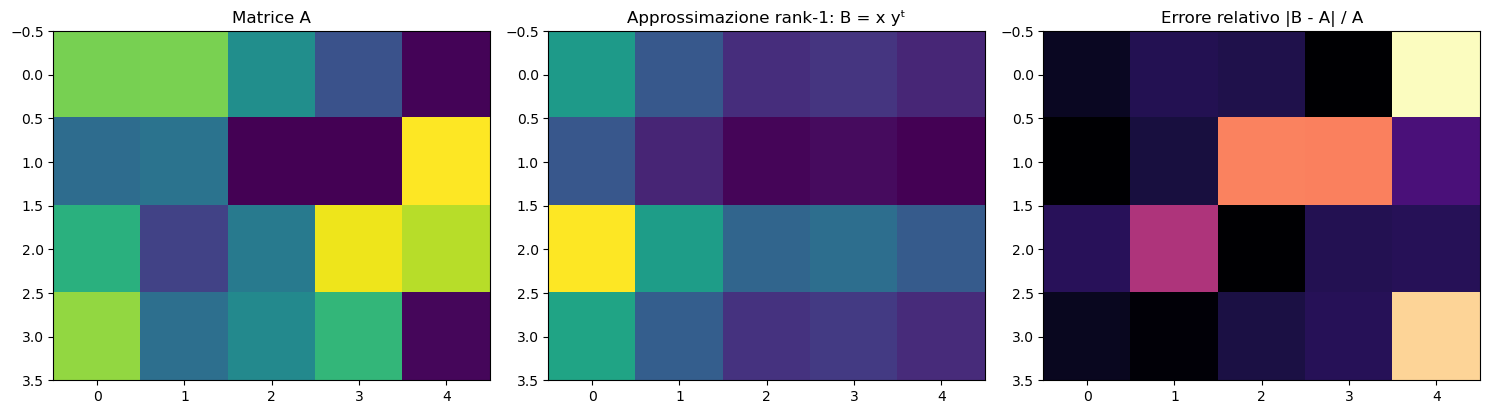

In [19]:
import matplotlib.pyplot as plt

# Ricostruisci la matrice rank-1 B
B = np.outer(x.value, y.value)
print(A)
print()
print(B)
print()
print(np.round(B - A, 3))
print(np.linalg.matrix_rank(B))

fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# A originale
axs[0].imshow(A, cmap='viridis')
axs[0].set_title("Matrice A")

# B ricostruita
axs[1].imshow(B, cmap='viridis')
axs[1].set_title("Approssimazione rank-1: B = x yᵗ")

# Errore relativo per elemento
axs[2].imshow(np.abs(B - A) / A, cmap='magma')
axs[2].set_title("Errore relativo |B - A| / A")

plt.tight_layout()
plt.show()
